In [1]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 2257 (delta 10), reused 11 (delta 6), pack-reused 2239
Receiving objects: 100% (2257/2257), 5.29 MiB | 4.24 MiB/s, done.
Resolving deltas: 100% (1484/1484), done.


In [2]:
!pip install -U -r yolov5/requirements.txt

Requirement already up-to-date: Cython in /usr/local/lib/python3.6/dist-packages (from -r yolov5/requirements.txt (line 4)) (0.29.21)
     |████████████████████████████████| 11.6MB 266kB/s 
     |████████████████████████████████| 14.5MB 236kB/s 
     |████████████████████████████████| 49.4MB 58kB/s 
     |████████████████████████████████| 2.2MB 38.0MB/s 
     |████████████████████████████████| 276kB 38.5MB/s 
     |████████████████████████████████| 25.9MB 117kB/s 
Requirement already up-to-date: tensorboard>=2.2 in /usr/local/lib/python3.6/dist-packages (from -r yolov5/requirements.txt (line 11)) (2.3.0)
Requirement already up-to-date: torch>=1.6.0 in /usr/local/lib/python3.6/dist-packages (from -r yolov5/requirements.txt (line 12)) (1.6.0+cu101)
Requirement already up-to-date: torchvision>=0.7.0 in /usr/local/lib/python3.6/dist-packages (from -r yolov5/requirements.txt (line 13)) (0.7.0+cu101)
     |████████████████████████████████| 71kB 7.9MB/s 
  Created wheel for PyYAML: filename=P

In [3]:
%cd /content/yolov5

/content/yolov5


In [4]:
import torch
from IPython.display import Image
from utils.google_utils import gdrive_download

print('torch %s %s' %(torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

torch 1.6.0+cu101 _CudaDeviceProperties(name='Tesla K80', major=3, minor=7, total_memory=11441MB, multi_processor_count=13)


In [24]:
%cd /content/

/content


In [25]:
! curl -L "https://public.roboflow.ai/ds/0s5nn122YQ?key=gQkbhq62zL"> roboflow.zip; unzip roboflow.zip; rm roboflow.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   896  100   896    0     0    971      0 --:--:-- --:--:-- --:--:--   971
100 5082k  100 5082k    0     0  4396k      0  0:00:01  0:00:01 --:--:-- 4396k
Archive:  roboflow.zip
 extracting: test/images/BloodImage_00334_jpg.rf.3b8a84d57940aeb45e5c2046c8411996.jpg  
 extracting: test/images/BloodImage_00369_jpg.rf.99ae139e5530a25980b7acdd56a4317c.jpg  
 extracting: test/images/BloodImage_00266_jpg.rf.6d62684a33e2f5bc048803aba3177f58.jpg  
 extracting: test/images/BloodImage_00120_jpg.rf.6742a4da047e1226a181d2de2978ce6d.jpg  
 extracting: test/images/BloodImage_00113_jpg.rf.a6d6a75c0ebfc703ecff95e2938be34d.jpg  
 extracting: test/images/BloodImage_00275_jpg.rf.9108b9a016fadd9c367b05dfb0c40c2c.jpg  
 extracting: test/images/BloodImage_00350_jpg.rf.1a19e9f9f197fbeab278718f7c6cea9b.jpg  
 extracting: test/images/BloodImage_00227_jpg

In [26]:
!ls

coco128		     data.yaml		 README.roboflow.txt  test   valid
custom_yolov5s.yaml  README.dataset.txt  sample_data	      train  yolov5


In [27]:
!cat data.yaml

train: ../train/images
val: ../valid/images

nc: 3
names: ['Platelets', 'RBC', 'WBC']

In [29]:
%cd /content/yolov5

/content/yolov5


In [30]:
!ls

data	    inference		README.md	     test.py	     valid
data.yaml   LICENSE		README.roboflow.txt  train	     weights
detect.py   models		requirements.txt     train.py
Dockerfile  __pycache__		runs		     tutorial.ipynb
hubconf.py  README.dataset.txt	test		     utils


In [57]:
!python train.py --img 200 --batch 16 --epochs 50  --data ../custom_yolov5s.yaml --cfg ./models/yolov5s.yaml --weights ''

Using CUDA device0 _CudaDeviceProperties(name='Tesla K80', total_memory=11441MB)

Namespace(adam=False, batch_size=16, bucket='', cache_images=False, cfg='./models/yolov5s.yaml', data='../custom_yolov5s.yaml', device='', epochs=50, evolve=False, global_rank=-1, hyp='data/hyp.scratch.yaml', img_size=[200, 200], local_rank=-1, logdir='runs/', multi_scale=False, name='', noautoanchor=False, nosave=False, notest=False, rect=False, resume=False, single_cls=False, sync_bn=False, total_batch_size=16, weights='', workers=8, world_size=1)
Start Tensorboard with "tensorboard --logdir runs/", view at http://localhost:6006/
2020-08-20 11:41:26.878856: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Hyperparameters {'lr0': 0.01, 'momentum': 0.937, 'weight_decay': 0.0005, 'giou': 0.05, 'cls': 0.5, 'cls_pw': 1.0, 'obj': 1.0, 'obj_pw': 1.0, 'iou_t': 0.2, 'anchor_t': 4.0, 'fl_gamma': 0.0, 'hsv_h': 0.015, 'hsv_s': 0.7, 'hsv_v': 0.4, '

In [58]:
!ls

data	    inference		README.md	     test.py	     valid
data.yaml   LICENSE		README.roboflow.txt  train	     weights
detect.py   models		requirements.txt     train.py
Dockerfile  __pycache__		runs		     tutorial.ipynb
hubconf.py  README.dataset.txt	test		     utils


In [59]:
%cd runs

/content/yolov5/runs


In [60]:
!ls

exp0  exp1  exp2  exp3	exp4  exp5  exp6  exp7	exp8


In [61]:
%cd exp8

/content/yolov5/runs/exp8


In [62]:
!ls

events.out.tfevents.1597923688.5aec5d817ad8.988.0  test_batch0_gt.jpg
hyp.yaml					   test_batch0_pred.jpg
labels.png					   train_batch0.jpg
opt.yaml					   train_batch1.jpg
results.png					   train_batch2.jpg
results.txt					   weights


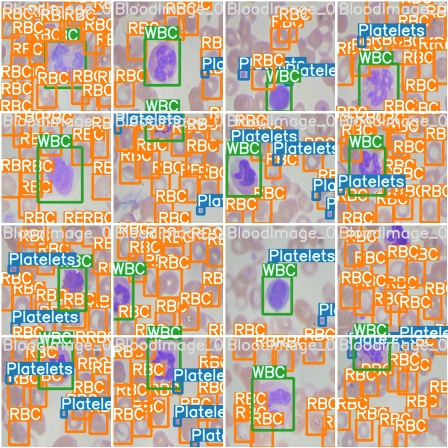

In [63]:
Image(filename='./test_batch0_gt.jpg', width =900)

In [56]:
%cd ..

/content/yolov5
